Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [3]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

In [1]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [6]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

#!pip install mat73
import mat73
import pandas as pd
import numpy as np

DATA_DIR = "/content/drive/MyDrive/pulsedb/"

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       175166496 kB
MemFree:        96325148 kB
MemAvailable:   171807000 kB
Buffers:          212252 kB
Cached:         75080952 kB
SwapCached:            0 kB
Active:         17863280 kB
Inactive:       58497416 kB
Active(anon):       1536 kB
Inactive(anon):  1068084 kB
Active(file):   17861744 kB
Inactive(file): 57429332 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               248 kB
Writeback:             0 kB
AnonPages:       1003064 kB
Mapped:           532124 kB
Shmem:              2116 kB
KReclaimable:    1785992 kB
Slab:            2039520 kB
SReclaimable:    1785992 kB
SUnreclaim:       253528 kB
KernelStack:       10352 kB
PageTables:        15744 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    87583248 kB
Committed_AS:    5274736 kB
VmallocTotal:   34359738367 kB
VmallocUsed:      103248 kB
VmallocChunk:  

In [7]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [8]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


=== Summary Statistics for df_Train ===


,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
count,465480.000000,465480.000000,465480.000000,465480.000000,465480.000000,465480.000000,465480,465480.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1293,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,p006090_1,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN
mean,58.980983,22.918767,62.915730,0.576953,162.502705,115.476681,NaN,60.823895
std,15.032404,3.437773,12.084088,0.494043,9.641188,18.933862,NaN,11.659300
min,0.400000,12.400000,16.226861,0.000000,54.000000,38.507506,NaN,4.800000
25%,51.000000,20.700000,54.445346,0.000000,156.600000,102.080878,NaN,53.100000
50%,61.000000,22.800000,62.174959,1.000000,162.900000,113.992528,NaN,59.900000
75%,70.000000,25.000000,70.523158,1.000000,169.200000,127.303095,NaN,68.050000


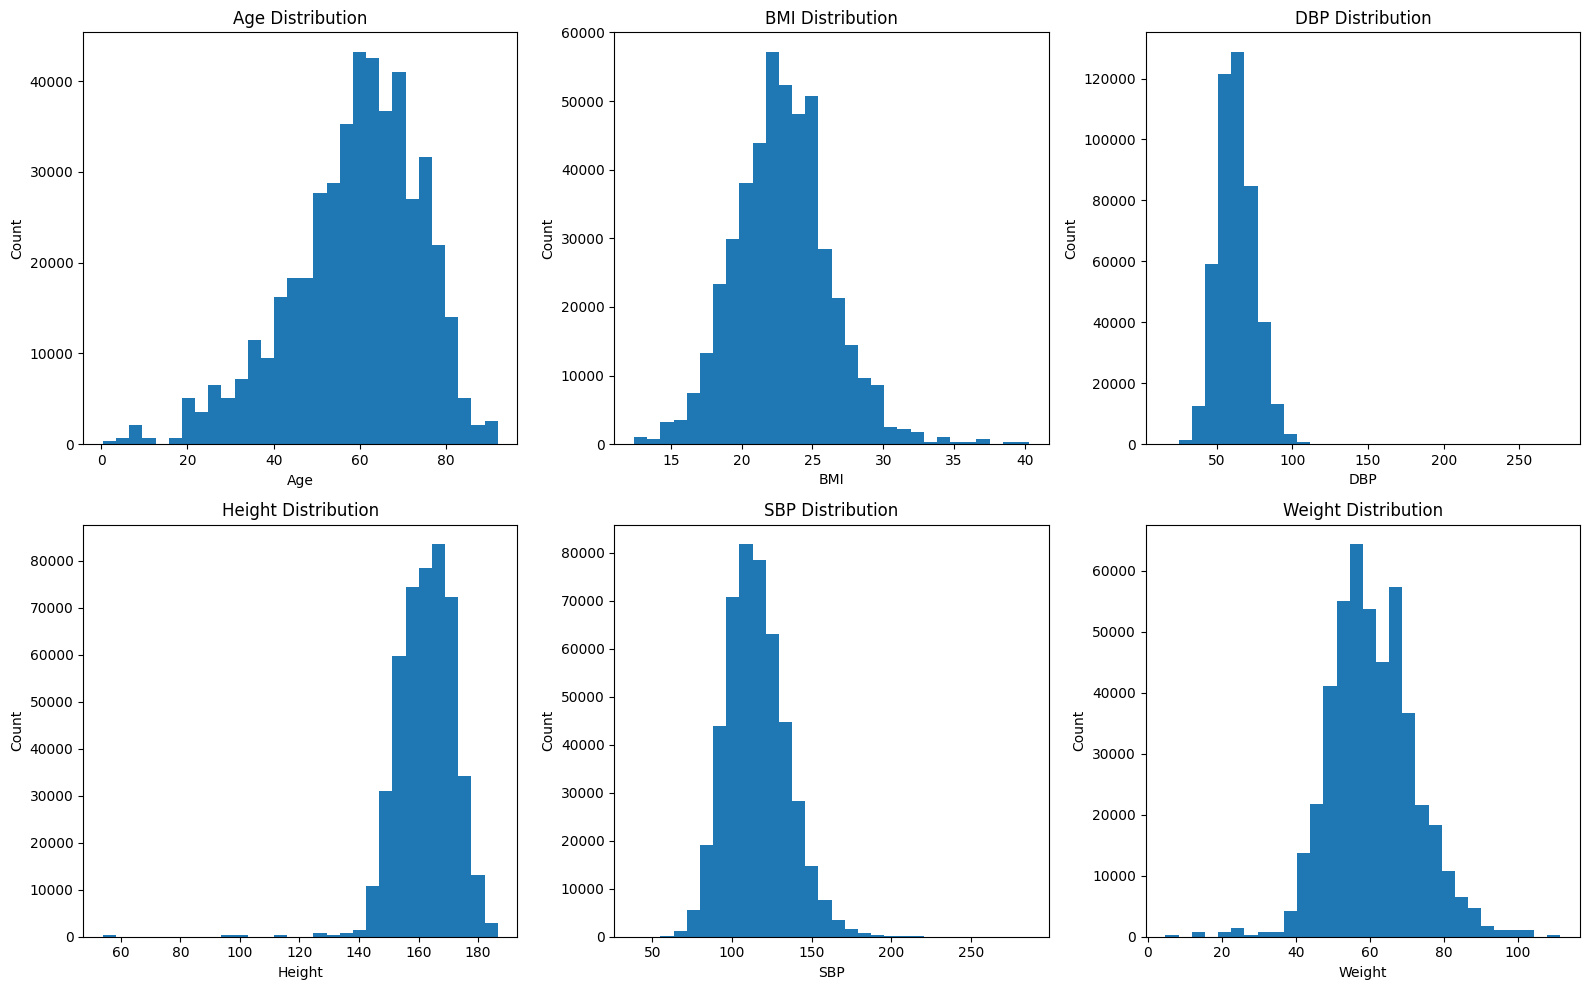

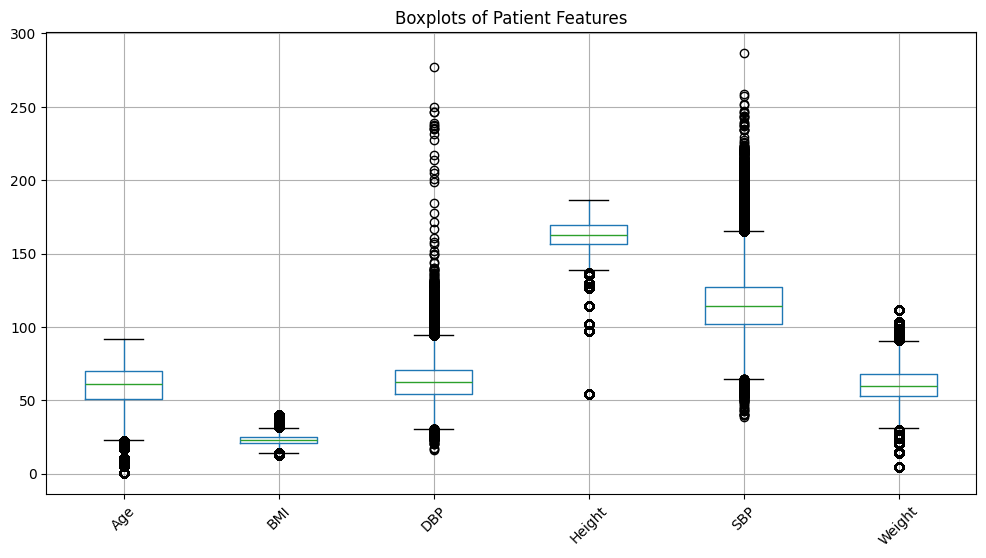

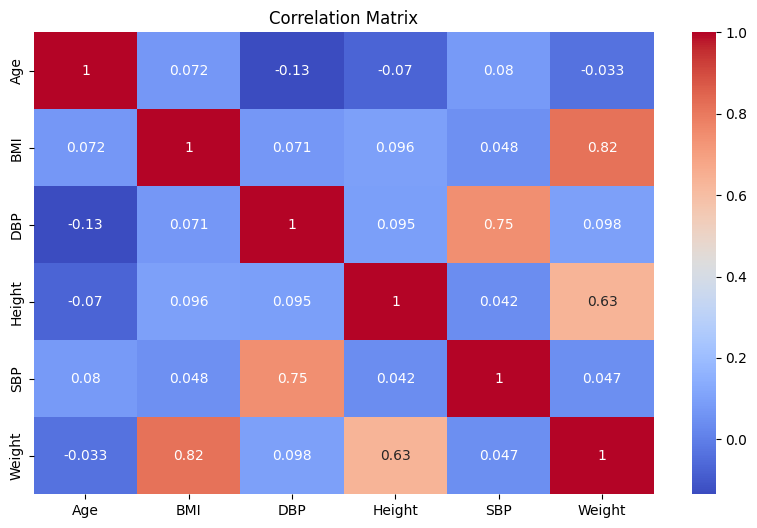


=== ECG Summary ===
Length: 465480 samples
Mean: 0.242
Std: 0.194
Min: 0.000
Max: 1.000
25%: 0.100216
50% (median): 0.183
75%: 0.330151

=== PPG Summary ===
Length: 465480 samples
Mean: 0.343
Std: 0.292
Min: 0.000
Max: 1.000
25%: 0.102093
50% (median): 0.236
75%: 0.551636

=== ABP Summary ===
Length: 465480 samples
Mean: 82.342
Std: 22.874
Min: -515.580
Max: 395.502
25%: 65.599689
50% (median): 78.372
75%: 95.684232


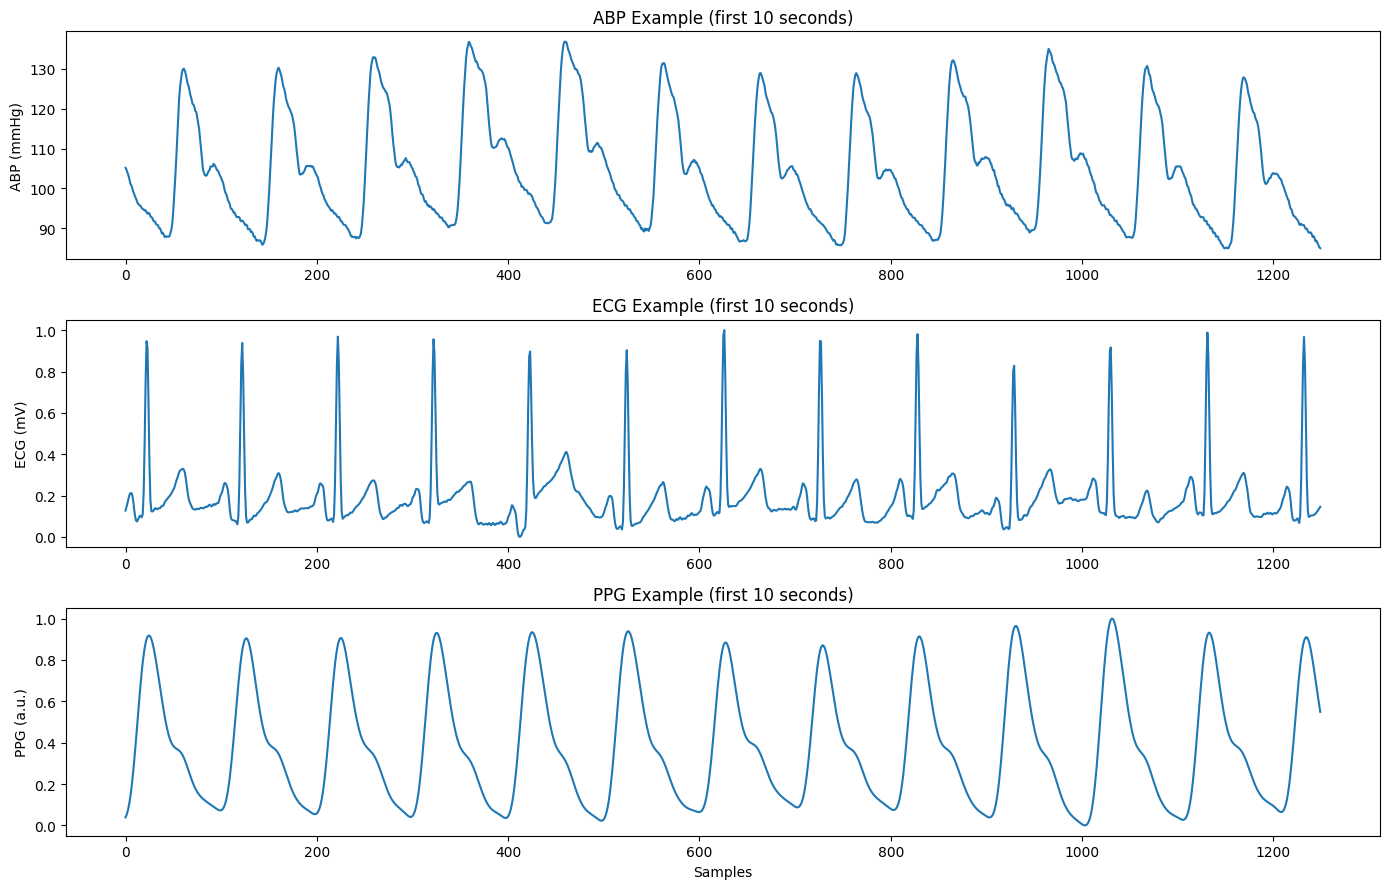

In [11]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#summary statistics for df_Train
print("=== Summary Statistics for df_Train ===")
display(df_Train.describe(include='all'))

#histograms for each of the features in df_Train
numeric_cols = ['Age', 'BMI', 'DBP', 'Height', 'SBP', 'Weight']

plt.figure(figsize =(16,10))

for i, col in enumerate(numeric_cols):
  plt.subplot(2,3,i+1)
  plt.hist(df_Train[col], bins = 30)
  plt.title(f"{col} Distribution")
  plt.xlabel(col)
  plt.ylabel("Count")

plt.tight_layout()
plt.show()

#boxplots for outlier detection
plt.figure(figsize = (12,6))
df_Train[numeric_cols].boxplot()
plt.title("Boxplots of Patient Features")
plt.xticks(rotation=45)
plt.show()

#correlation matrix
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df_Train[numeric_cols].corr(), annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

#summary statistics for the signal features
signals = {"ECG": ECG_Train, "PPG": PPG_Train, "ABP": ABP_Train}

for name, sig in signals.items():
  print(f"\n=== {name} Summary ===")
  print(f"Length: {len(sig)} samples")
  print(f"Mean: {np.mean(sig):.3f}")
  print(f"Std: {np.std(sig):.3f}")
  print(f"Min: {np.min(sig):.3f}")
  print(f"Max: {np.max(sig):.3f}")
  print(f"25%: {np.percentile(sig, 25):3f}")
  print(f"50% (median): {np.median(sig):.3f}")
  print(f"75%: {np.percentile(sig, 75):3f}")

#plotting the signal waveforms
fs = 125 #in hertz, the sampling rate given in paper
duration_sec = 10
N = duration_sec * fs

plt.figure(figsize = (14, 9))

plt.subplot(3,1,1)
plt.plot(ABP_Train[0])
plt.title("ABP Example (first 10 seconds)")
plt.ylabel("ABP (mmHg)")

plt.subplot(3,1,2)
plt.plot(ECG_Train[0])
plt.title("ECG Example (first 10 seconds)")
plt.ylabel("ECG (mV)")

plt.subplot(3,1,3)
plt.plot(PPG_Train[0])
plt.title("PPG Example (first 10 seconds)")
plt.ylabel("PPG (a.u.)")
plt.xlabel("Samples")

plt.tight_layout()
plt.show()


#2. Blood Pressure Prediction


In [ ]:
# your code here

#3. Generative Modeling

In [ ]:
# your code here